# Image White Balancing

## Import necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Function for displaying original and balanced images

In [2]:
def plot_images(original, balanced):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('on')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB))
    plt.title('Balanced Image')
    plt.axis('on')

    plt.show()

## Load image

In [3]:
# Load the image
input_image = cv2.imread('./images/sunset.jpg')

# Convert the image to float32
image = input_image.astype(np.float32)

## White patch using (R_max, G_max, B_max)

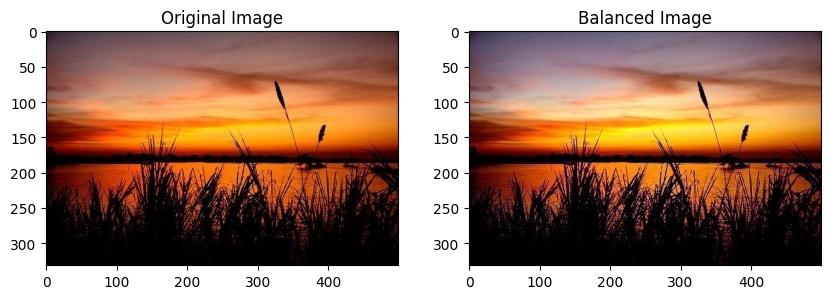

In [4]:
# Get the max of R, G, B in entire image
B_max = np.max(image[:, :, 0])
G_max = np.max(image[:, :, 1])
R_max = np.max(image[:, :, 2])

# Apply the scaling factors to the entire image
balanced_image = image.copy()
balanced_image[:, :, 0] /= B_max
balanced_image[:, :, 1] /= G_max
balanced_image[:, :, 2] /= R_max

# Ensure that pixel values are in the valid range [0, 1]
balanced_image = np.clip(balanced_image, 0, 1)

# Convert the image back to uint8 data type
balanced_image = (balanced_image * 255).astype(np.uint8)

# Display the original and balanced images
plot_images(input_image, balanced_image)

## White patch using I_max = max(R_max, G_max, B_max)

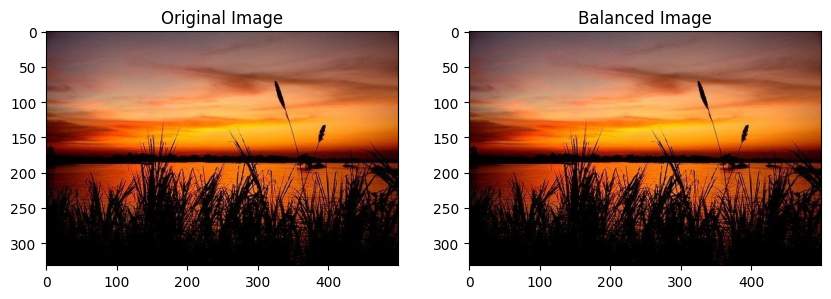

In [5]:
# Calculate I_max
I_max = np.max([R_max, G_max, B_max])

# Apply the scaling factors to the whole image
balanced_image_2 = image / I_max

# Ensure that pixel values are in the valid range [0, 1]
balanced_image_2 = np.clip(balanced_image_2, 0, 1)

# Convert the image back to uint8 data type
balanced_image_2 = (balanced_image_2 * 255).astype(np.uint8)

# Display the original and balanced images
plot_images(input_image, balanced_image_2)

## Gray world

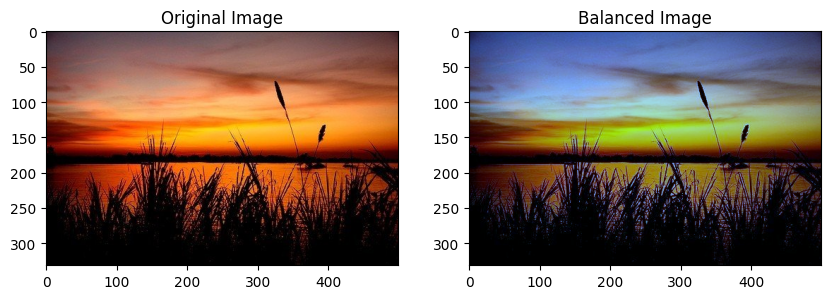

In [6]:
# Calculate mean of the whole image
image_mean = np.mean(image, dtype=np.float32)
B_mean = np.mean(image[:, :, 0], dtype=np.float32)
G_mean = np.mean(image[:, :, 1], dtype=np.float32)
R_mean = np.mean(image[:, :, 2], dtype=np.float32)

# Balance each pixel of the image by the mean
balanced_image_3 = image.copy()
balanced_image_3[:, :, 0] *= image_mean / B_mean
balanced_image_3[:, :, 1] *= image_mean / G_mean
balanced_image_3[:, :, 2] *= image_mean / R_mean

# Ensure that pixel values are in the valid range [0, 255]
balanced_image_3 = np.clip(balanced_image_3, 0, 255)

# Convert the image back to uint8 data type
balanced_image_3 = balanced_image_3.astype(np.uint8)

# Display the original and balanced images
plot_images(input_image, balanced_image_3)

## Ground truth

(332, 500, 3)
Choose patch: (20, 100) -> (40, 200)


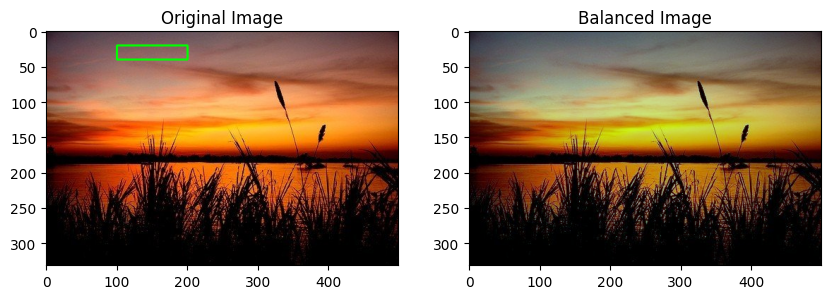

In [7]:
# Choose patch
print(image.shape)
x1, y1 = 100, 20
x2, y2 = 200, 40
print(f"Choose patch: ({y1}, {x1}) -> ({y2}, {x2})")
patch = image[y1:y2, x1:x2]

# Calculate mean of the patch
patch_mean = np.mean(patch, dtype=np.float32)
B_patch_mean = np.mean(patch[:, :, 0], dtype=np.float32)
G_patch_mean = np.mean(patch[:, :, 1], dtype=np.float32)
R_patch_mean = np.mean(patch[:, :, 2], dtype=np.float32)

# Balance each pixel of the image by the patch mean
balanced_image_4 = image.copy()
balanced_image_4[:, :, 0] *= patch_mean / B_patch_mean
balanced_image_4[:, :, 1] *= patch_mean / G_patch_mean
balanced_image_4[:, :, 2] *= patch_mean / R_patch_mean

# Ensure that pixel values are in the valid range [0, 255]
balanced_image_4 = np.clip(balanced_image_4, 0, 255)

# Convert the image back to uint8 data type
balanced_image_4 = balanced_image_4.astype(np.uint8)

image_with_patch = input_image.copy()
rectangle_color = (0, 255, 0)  # Green color
cv2.rectangle(image_with_patch, (x1, y1), (x2, y2), rectangle_color, 2)

# Display the original and balanced images
plot_images(image_with_patch, balanced_image_4)